# Run some examples in OpenOA

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import operational_analysis
operational_analysis.__file__, operational_analysis.__version__

('/Users/jperrsau/cu-src/appm5650/project/OpenOA/operational_analysis/__init__.py',
 '2.2')

In [4]:
import sys
sys.path.append("./OpenOA/examples")

In [5]:
from project_ENGIE import Project_Engie

In [6]:
project = Project_Engie('./OpenOA/examples/data/la_haute_borne')

In [7]:
project.prepare()

INFO:project_ENGIE:Loading SCADA data
INFO:operational_analysis.types.timeseries_table:Loading name:la-haute-borne-data-2014-2015
INFO:project_ENGIE:SCADA data loaded
INFO:project_ENGIE:Timestamp QC and conversion to UTC
INFO:project_ENGIE:Correcting for out of range of temperature variables
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:project_ENGIE:Flagging unresponsive sensors
INFO:project_ENGIE:Converting field names to IEC 61400-25 standard
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:merra2_la_haute_borne
INFO:operational_analysis.types.timeseries_table:Loading name:era5_wind_la_haute_borne


In [8]:
from operational_analysis.methods import plant_analysis

In [16]:
pa = plant_analysis.MonteCarloAEP(project, reanal_products = ['era5', 'merra2'], regression_frac=1.0, qmc=True)

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


In [17]:

pa.run(num_sim=2048, reanal_subset=['era5', 'merra2'])

INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 2048, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 2048/2048 [00:18<00:00, 111.05it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed


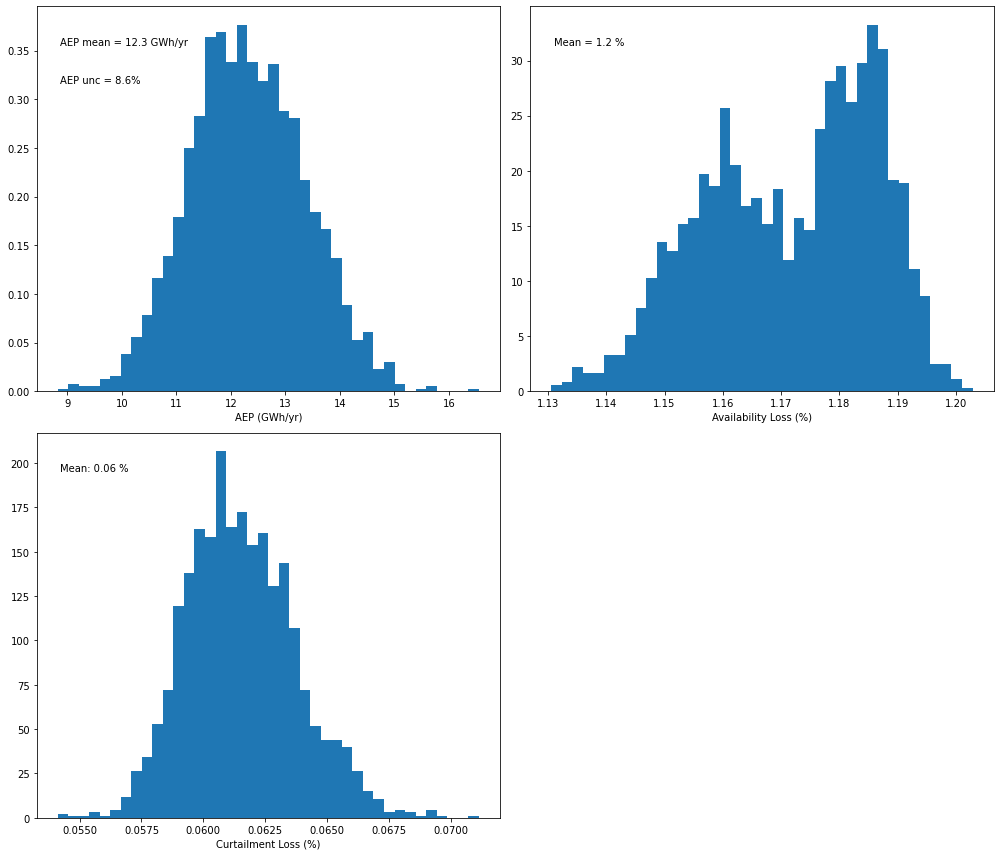

In [18]:
pa.plot_result_aep_distributions().show()

In [19]:
pa.results["aep_GWh"].mean()

12.317722305321368

In [20]:
pa.results["aep_GWh"].std()

1.0536506156725511

# Let's print out solution surfaces using QMC samples

In [23]:
import matplotlib.pyplot as plt

In [13]:
pa = plant_analysis.MonteCarloAEP(project,
    reanal_products = ['era5', 'merra2'],
    regression_frac=1.0,
    bootstrap_reg_data=False,
    iav_normal_correction=False,
    qmc=True)

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


In [25]:
pa.run(num_sim=4096)

INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 4096, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 4096/4096 [00:34<00:00, 118.89it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed


In [26]:
pa._inputs
#pa.results.aep_GWh

,metered_energy_fraction,loss_fraction,reanalysis_product,num_years_windiness,loss_threshold
0,0.999959,0.997312,era5,14,0.10
1,1.000014,1.005833,merra2,18,0.15
2,1.000032,0.999736,era5,12,0.20
3,0.999991,1.001123,merra2,16,0.15
4,1.000000,0.999101,merra2,17,0.12
...,...,...,...,...,...
4091,1.000000,1.002976,merra2,14,0.16
4092,0.999991,0.996336,merra2,14,0.17
4093,1.000032,1.002047,era5,20,0.12
4094,1.000014,0.998417,merra2,10,0.13


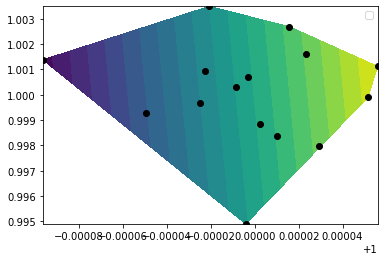

In [33]:
results = pa._inputs.copy()
results["AEP"] = pa.results.aep_GWh

slice = results.query("reanalysis_product=='merra2' and num_years_windiness==13 and loss_threshold==0.2")

plt.tricontourf(slice["metered_energy_fraction"], slice["loss_fraction"], slice["AEP"], levels=20)
plt.plot(slice["metered_energy_fraction"], slice["loss_fraction"], 'ko')
plt.legend()

In [1]:
# Inspect the mc params in openoa under both setups

In [15]:
pa = plant_analysis.MonteCarloAEP(project,
                                reanal_products = ['era5', 'merra2'],
                                regression_frac=1.0,
                                qmc=True,
                                seed=42,
                                bootstrap_reg_data=False,
                                iav_normal_correction=False)
pa.run(num_sim=256, reanal_subset=['era5', 'merra2'])

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object
INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 256, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 256/256 [00:02<00:00, 101.21it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed


In [16]:
pa_rand = plant_analysis.MonteCarloAEP(project,
                                reanal_products = ['era5', 'merra2'],
                                regression_frac=1.0,
                                qmc=False,
                                seed=42,
                                bootstrap_reg_data=False,
                                iav_normal_correction=False)
pa_rand.run(num_sim=256, reanal_subset=['era5', 'merra2'])

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object
INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 256, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 256/256 [00:02<00:00, 104.48it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed


In [17]:
pa._inputs.describe()

,metered_energy_fraction,loss_fraction,num_years_windiness,loss_threshold
count,256.000000,256.000000,256.000000,256.000000
mean,1.000005,0.999925,14.996094,0.149961
std,0.005007,0.049898,3.181439,0.031728
min,0.985715,0.853802,10.000000,0.100000
25%,0.996657,0.966556,12.000000,0.120000
50%,0.999995,1.000115,15.000000,0.150000
75%,1.003368,1.033578,18.000000,0.180000
max,1.015320,1.133468,20.000000,0.200000


In [18]:
pa_rand._inputs.describe()

,metered_energy_fraction,loss_fraction,num_years_windiness,loss_threshold
count,256.000000,256.000000,256.000000,256.000000
mean,1.000004,1.000402,14.824219,0.152656
std,0.004880,0.049194,3.135558,0.032958
min,0.986901,0.837937,10.000000,0.100000
25%,0.996572,0.964914,12.000000,0.120000
50%,1.000296,0.999495,15.000000,0.160000
75%,1.003076,1.032478,17.000000,0.180000
max,1.019264,1.153944,20.000000,0.200000


In [14]:
pa.uncertainty_meter

0.005